**探索合併後的資料找課題**

In [1]:
import pandas as pd
import numpy as np
import facebook as fb
import matplotlib.pyplot as plt

In [37]:
UNIT_TIME = 90 # 一個購物週期3個月
UNIT_CNT = 4
UNIT_RECENT_COUNT_THREDSHOLD = 10

**讀取資料**

In [3]:
member = pd.read_csv('../NTU_1317_Member.txt', sep='\t')

C:\Users\andyl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
main_data = pd.read_csv('../Ntu_Orders.csv')

**選擇最近一個購物周期內的購物紀錄**

In [5]:
main_data['DateId'] = pd.to_datetime(main_data['DateId'].astype(str), format='%Y%m%d')

In [6]:
time_start = main_data['DateId'].max() - pd.Timedelta(days=UNIT_TIME * UNIT_CNT)
main_data = main_data[main_data['DateId'] > time_start]
main_data

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
20,49426273,2017-12-11,0FD7F9F2-47B3-4EF3-8CA7-DDC7C79336CA,49489674,1317,8192,b'\x89~\n\r\xect\x8d`\xd5\xe1\x7f\xdd\xc9\x9e\...,Web,Brand,Mobile,...,199.0,-19.0,0.0,180.0,2017-12-11 23:04:23.840,Finish,Family,Family,NaN,False
21,50909705,2018-01-02,F51F1B83-4195-4B70-8E40-B8888F4A46D6,50973437,1317,16086,"b'\xae\xe9\xf6&""&\xb5\x1e\xa7\xfe\x19M9\xb1\xf...",AndroidApp,Brand,Mobile,...,690.0,-366.0,0.0,324.0,2018-01-02 21:39:29.483,WaitingToShipping,Family,Family,NaN,False
22,50909706,2018-01-02,F51F1B83-4195-4B70-8E40-B8888F4A46D6,50973438,1317,16102,"b'\xae\xe9\xf6&""&\xb5\x1e\xa7\xfe\x19M9\xb1\xf...",AndroidApp,Brand,Mobile,...,740.0,-405.0,0.0,335.0,2018-01-02 21:39:29.500,WaitingToShipping,Family,Family,NaN,False
23,50913757,2018-01-02,241AA95E-6A4D-4B07-BDE7-DF5D2730DCC1,50977491,1317,15736,b'\xee\xdd\xf5\xe8\x1b\x1b\xdf\x1dU\xd4\x0f\x1...,AndroidApp,Brand,Mobile,...,790.0,-461.0,0.0,329.0,2018-01-02 22:24:48.677,WaitingToShipping,Family,Family,NaN,False
24,50913758,2018-01-02,241AA95E-6A4D-4B07-BDE7-DF5D2730DCC1,50977492,1317,15548,b'\xee\xdd\xf5\xe8\x1b\x1b\xdf\x1dU\xd4\x0f\x1...,AndroidApp,Brand,Mobile,...,450.0,-41.0,0.0,409.0,2018-01-02 22:24:48.693,WaitingToShipping,Family,Family,NaN,False
25,50913828,2018-01-02,19690996-39DC-4FE4-9A4D-C883068022DF,50977562,1317,8434,b'R\x07\x9ao\xe6G\xe9\x8b\x80\x9e<[\x175j\x18f...,AndroidApp,Brand,Mobile,...,690.0,-386.0,0.0,304.0,2018-01-02 22:25:43.867,WaitingToShipping,Family,Family,NaN,False
26,48315528,2017-11-25,B1E0B793-755B-4BC7-9874-DA913992DD99,48378832,1317,15766,b'\x93\x91\x9e`\xf5\x89\xbaG\x16\xc0\xed%\xdd\...,Web,Brand,Mobile,...,0.0,0.0,0.0,0.0,2017-11-25 12:35:47.470,Finish,SevenEleven,SevenEleven,NaN,False
27,48317227,2017-11-25,B9F09014-CF60-4240-9239-0AB5AED5196D,48380531,1317,15766,"b'\xf8\x80`\xd1B\xfd""\x06\x1b\xb3i\x90\xf72\xc...",Web,Brand,Mobile,...,0.0,0.0,0.0,0.0,2017-11-25 13:03:29.990,Finish,SevenEleven,SevenEleven,NaN,False
28,48320874,2017-11-25,0DD49160-F823-4273-90B2-D81F87FDA73D,48384178,1317,15766,b'\x01\x962\x9d\xb7\xbaBb{d\xfe\x8aQ\xdeRq1Q\x...,Web,Brand,Mobile,...,0.0,0.0,0.0,0.0,2017-11-25 14:10:36.750,Finish,SevenEleven,SevenEleven,NaN,False
29,48322545,2017-11-25,22362EDF-B577-42E9-A574-E95598D970DE,48385849,1317,15766,b'\x14\x84Tc\xfc\x9cA\xa1\x1d\xe0\xb0\x0e\x84\...,Web,Brand,Mobile,...,0.0,0.0,0.0,0.0,2017-11-25 14:39:01.430,Finish,SevenEleven,SevenEleven,NaN,False


**統計單次消費金額**

In [7]:
main_by_basket = main_data.groupby(by=['TradesOrderGroupCode','MemberId'], as_index=False)['SalesOrderSlaveTotalPayment'].sum()
main_by_basket

,TradesOrderGroupCode,MemberId,SalesOrderSlaveTotalPayment
0,"b"" y!'[+Jr\xd6\xd2D@\x1e\xee\x17lm\xca\xda""",D9EAAC0E-21F7-40B6-B772-B1B522E54F5F,837.0
1,"b"" #\xa6'/\x82\xe7`\xb6\xb6\xfd\xa9p\x9cIr\x11...",52EA5CE7-D2F0-4410-B339-A6ED6C18B8A3,647.0
2,"b"" #\xfeH\xbc\xeb2\x1a\xd8\xd5n\x0b'\x0e6CEf\x...",88142B29-5D86-4338-A450-A04E547DC74B,690.0
3,"b"" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\...",4A84F2A6-C852-44DC-94B4-686814DE798B,921.0
4,"b"" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\...",DDB25D8C-C936-4D37-BF28-3F2F4692C5A8,1583.0
5,"b"" '\x08\xffW\xcby`]\x15\xba\xff\xabE\xee\xa1\...",10A11D54-E407-4C98-9771-F0C926DA6E6C,747.0
6,"b"" '\x15\xa0\x15\xea\x8f\xc5\xe6\xedk\xba\x0cP...",B984166B-C4B9-4749-AFDD-EB6BCD9C2E16,629.0
7,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",42271E13-FDE9-484D-9F4A-C3C4BD89850F,2042.0
8,"b"" '\x8b8~\x9a\x1c\xcf\xc2\x01\x9d\x11\xbc'\x8...",BC448310-A8CA-4577-95D3-4631302EEBF2,1190.0
9,"b"" '\xb9)p\x89\x99\xa0\x00\xa1\xce\x12m=\xb9\x...",21EFA6EF-0D68-4D22-B018-1666A8665F75,549.0


**計算每位會員平均單次消費額**

In [8]:
'''

def group(df, who):
    mean = 0; cnt = 0
    for i in range(df.shape[0]):
        if df['MemberId'][i] == who:
            #mean += df['UnitPrice'][i] * df['Quantity'][i]
            mean += df['TotalPurchase'][i]
            cnt += 1
    return mean / cnt
group(main_by_basket, 'D9EAAC0E-21F7-40B6-B772-B1B522E54F5F')

'''

"\n\ndef group(df, who):\n    mean = 0; cnt = 0\n    for i in range(df.shape[0]):\n        if df['MemberId'][i] == who:\n            #mean += df['UnitPrice'][i] * df['Quantity'][i]\n            mean += df['TotalPurchase'][i]\n            cnt += 1\n    return mean / cnt\ngroup(main_by_basket, 'D9EAAC0E-21F7-40B6-B772-B1B522E54F5F')\n\n"

In [9]:
def rename_col_to(name):
    if name == 'SalesOrderSlaveTotalPayment':
        return 'RecentAveragePurchase'
    else:
        return name
    
member_avg = pd.DataFrame()
member_avg = main_by_basket.groupby(by='MemberId', as_index=False).agg('mean')
member_avg = member_avg.rename(columns = rename_col_to)
member_avg.head()

,MemberId,RecentAveragePurchase
0,00002962-4E01-4D5B-A23C-AF05A965212E,2963.0
1,000037B9-82D7-4F41-A748-FD64AF00A535,1196.0
2,00004BE7-17B5-4DA8-A31D-673BCD22F018,316.0
3,00008557-6564-46EB-8B00-70D3DEE91FF0,679.0
4,000248F1-4864-40B7-A987-E27884C0971C,597.0


**統計該次購物周期內消費的總額**

In [10]:
member_cnt = main_by_basket.groupby(by='MemberId', as_index=False).agg('count')
member_avg['RecentCount'] = member_cnt['TradesOrderGroupCode']
member_avg['RecentTotal'] = member_avg['RecentCount'] * member_avg['RecentAveragePurchase']
member_avg.head()

,MemberId,RecentAveragePurchase,RecentCount,RecentTotal
0,00002962-4E01-4D5B-A23C-AF05A965212E,2963.0,2,5926.0
1,000037B9-82D7-4F41-A748-FD64AF00A535,1196.0,1,1196.0
2,00004BE7-17B5-4DA8-A31D-673BCD22F018,316.0,1,316.0
3,00008557-6564-46EB-8B00-70D3DEE91FF0,679.0,2,1358.0
4,000248F1-4864-40B7-A987-E27884C0971C,597.0,1,597.0


In [11]:
'''
#把index中的MemberId救出來
member_avg['Unnamed'] = list(range(0, member_avg.shape[0]))
member_avg['MemberId'] = member_avg.index.values
member_avg = member_avg.set_index('Unnamed')
member_avg
'''

"\n#把index中的MemberId救出來\nmember_avg['Unnamed'] = list(range(0, member_avg.shape[0]))\nmember_avg['MemberId'] = member_avg.index.values\nmember_avg = member_avg.set_index('Unnamed')\nmember_avg\n"

In [12]:
member_new = pd.merge(member, member_avg, on='MemberId')
member_new.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,RecentAveragePurchase,RecentCount,RecentTotal
0,1317,88812F54-9F19-49C0-BC77-86065C356D26,251,3,4011.0,1980-08-08,Female,NaN,台中市,台灣,...,1,2015-09-18,2017-05-02,有,NaN,2015-09-18 18:45:35.707,2017-07-30 21:30:34.940,1204.5,2,2409.0
1,1317,17ED6C4D-0B91-4EB4-9992-117E9440425D,56,3,2438.0,NaN,NaN,NaN,NaN,NaN,...,1,2017-06-02,2017-10-27,NaN,NaN,NaN,NaN,783.0,4,3132.0
2,1317,E697E909-3142-4686-A7C6-540909465169,13,3,2651.0,NaN,NaN,NaN,NaN,NaN,...,1,2015-10-01,2015-10-16,NaN,NaN,NaN,NaN,1229.0,2,2458.0
3,1317,D8A55D64-AEB0-4DC4-85C6-3372238C46D3,-1,0,0.0,NaN,NaN,NaN,NaN,NaN,...,1,2017-03-19,2017-03-19,NaN,NaN,NaN,NaN,199.0,1,199.0
4,1317,978EBCAE-9E66-44D9-926B-D35B0C1079E9,190,1,1174.0,NaN,NaN,NaN,NaN,NaN,...,1,2017-07-02,2017-07-02,NaN,NaN,NaN,NaN,1174.0,1,1174.0


**計算每個購買次數消費均額的平均值**
**並印出結果**

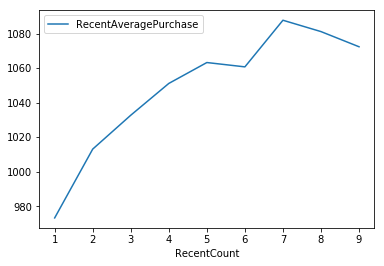

In [38]:
tmp0 = member_new.groupby(by=['RecentCount'], as_index=False)['RecentAveragePurchase'].mean()
tmp0[tmp0['RecentCount'] < UNIT_RECENT_COUNT_THREDSHOLD].plot.line(x='RecentCount', y='RecentAveragePurchase')
plt.show()

**計算每個購買次數消費總額的平均值**
**並印出結果**

**暫時不考慮 因為和次數重複**

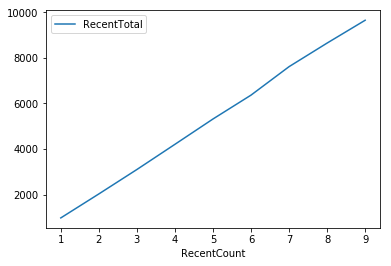

In [39]:
#tmp0=member_new.groupby(by='RecentCount', as_index=False)['RecentTotal'].mean()
#tmp0[tmp0['RecentCount'] < UNIT_RECENT_COUNT_THREDSHOLD].plot.line(x='RecentCount', y='RecentTotal')
#plt.show()